<a href="https://colab.research.google.com/github/takaito1/EAS6305_F24/blob/main/week2/calc_MLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed layer depth

    - The goal of this homework is to use the CTD profile data to calculate sigma-theta and mixed layer depth (MLD)
    - Use the sigma-theta profile to compute the MLD

In [1]:
! pip install gsw

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

### (a) Read BATS data and calculate sigma-theta

In [3]:
# Step 1 download data from BATS and create data vectors
# define headers first (since the excel sheet doesn't have one)
headers=['castid','dyear','date','lat','lon','pres','depth',
         'temperature','cond','salinity','DO','beam','fluo','PAR']
# read in the excel file
df=pd.read_excel('sample_data/b10331_ctd.xls',names=headers)
# display the overview of the contents of the excel sheet
df

,castid,dyear,date,lat,lon,pres,depth,temperature,cond,salinity,DO,beam,fluo,PAR
0,10331002,2016.946831,20161212,32.340767,64.593733,6,5.957368,21.586572,5.164972,36.680332,214.389597,0.442891,0.091892,178.098363
1,10331002,2016.946831,20161212,32.340767,64.593733,8,7.943637,21.587190,5.165100,36.680104,214.363203,0.442685,0.093883,146.975808
2,10331002,2016.946831,20161212,32.340767,64.593733,10,9.929642,21.587471,5.165239,36.680258,214.387684,0.442694,0.095130,124.969126
3,10331002,2016.946831,20161212,32.340767,64.593733,12,11.915647,21.587751,5.165378,36.680412,214.412165,0.442704,0.096377,102.962444
4,10331002,2016.946831,20161212,32.340767,64.593733,14,13.901856,21.588130,5.165469,36.680100,214.356475,0.442440,0.097961,93.945029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,10331017,2016.957256,20161216,31.978617,64.377817,1204,1192.162127,5.601566,3.460286,35.076543,223.434746,0.394602,0.022846,0.000493
9475,10331017,2016.957256,20161216,31.978617,64.377817,1206,1194.137209,5.599297,3.460209,35.077042,223.543457,0.394695,0.023517,0.000492
9476,10331017,2016.957256,20161216,31.978617,64.377817,1208,1196.111576,5.592080,3.459727,35.078075,223.945523,0.394700,0.021617,0.000492
9477,10331017,2016.957256,20161216,31.978617,64.377817,1210,1198.085631,5.591776,3.459910,35.079488,223.735999,0.394700,0.016633,0.000457


In [4]:
# get castid and convert it to numpy array
castid=df['castid'].to_numpy()
# latitude
lat=df['lat'].to_numpy()
# longitude
lon=df['lon'].to_numpy()*(-1) # longitude is in degree W so it should be negative
# depth
dep=df['depth'].to_numpy()
# pressure
p=df['pres'].to_numpy()
# temperature
t=df['temperature'].to_numpy()
# salinity
sp=df['salinity'].to_numpy()

In [5]:
# Step 2 calculate sigma-theta
# select cast
ca=(castid == 10331002)
sa = gsw.SA_from_SP(sp[ca],p[ca],lon[ca],lat[ca])
ct = gsw.CT_from_t(sa,t[ca],p[ca])
#
sigma0_sel = gsw.sigma0(sa,ct)
pres_sel = p[ca]

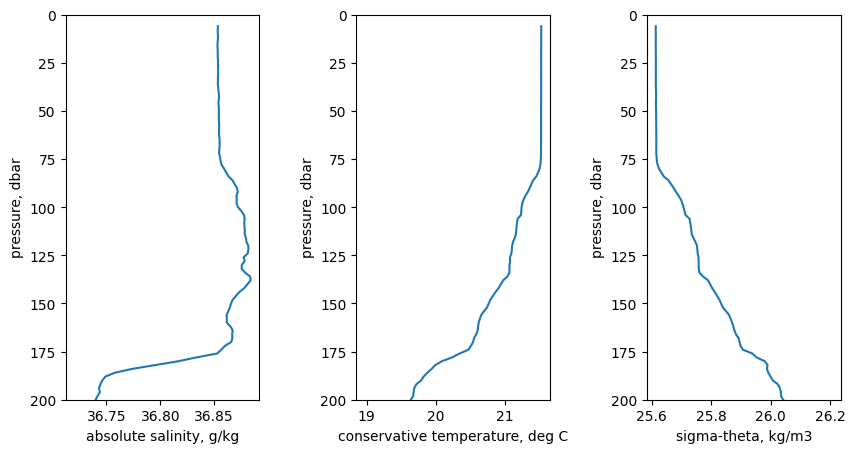

In [6]:
# plot
fig=plt.figure(figsize=(10,5))
ax=fig.subplots(1,3)
plt.subplots_adjust(wspace=0.5)
#
ax[2].plot(sigma0_sel,pres_sel,label='sigma-theta')
ax[2].set_xlabel('sigma-theta, kg/m3')
ax[2].set_ylabel('pressure, dbar')
ax[2].set_ylim(200,0)
#
ax[0].plot(sa,pres_sel,label='SA')
ax[0].set_xlabel('absolute salinity, g/kg')
ax[0].set_ylabel('pressure, dbar')
ax[0].set_ylim(200,0)
#
ax[1].plot(ct,pres_sel,label='CT')
ax[1].set_xlabel('conservative temperature, deg C')
ax[1].set_ylabel('pressure, dbar')
ax[1].set_ylim(200,0)
plt.show()

### (b) Determine mixed layer depth using sigma-theta profile

In [7]:
# First calculate the surface value
sig0_surf = min(sigma0_sel)
print(f'Surface sigma-theta = {np.round(sig0_surf,2)} kg/m3')

Surface sigma-theta = 25.61 kg/m3


In [8]:
# Start the loop
#
###### define density threshold
sig0_crit =
######

######
# mixed layer definition algorithm
for n,pres in enumerate(pres_sel):
    offset =
    if offset < sig0_crit:
        mld = pres_sel[n]
######

print(f'Mixed layer depth is {np.round(mld,2)} dbar level')

Mixed layer depth is 86 dbar level


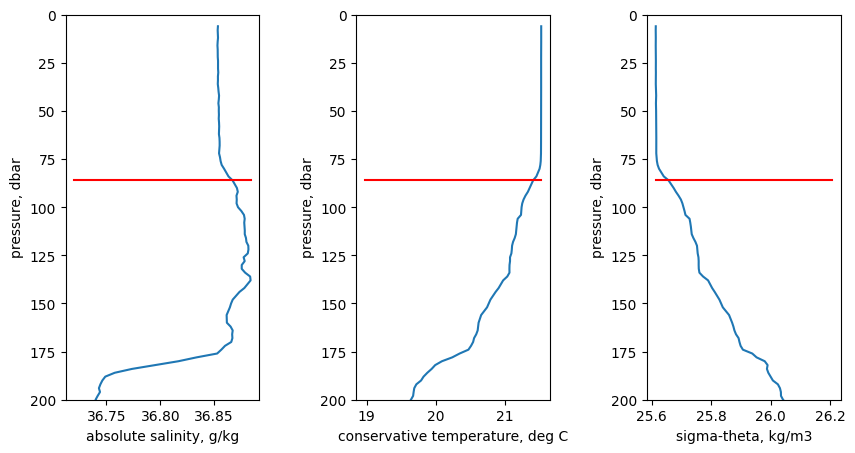

In [9]:
# plot
fig=plt.figure(figsize=(10,5))
ax=fig.subplots(1,3)
plt.subplots_adjust(wspace=0.5)
#
ax[2].plot(sigma0_sel,pres_sel,label='sigma-theta')
ax[2].plot([min(sigma0_sel), max(sigma0_sel)],[mld, mld],'r',label='mixed layder depth')
ax[2].set_xlabel('sigma-theta, kg/m3')
ax[2].set_ylabel('pressure, dbar')
ax[2].set_ylim(200,0)
#
ax[0].plot(sa,pres_sel,label='SA')
ax[0].plot([min(sa), max(sa)],[mld, mld],'r',label='mixed layder depth')
ax[0].set_xlabel('absolute salinity, g/kg')
ax[0].set_ylabel('pressure, dbar')
ax[0].set_ylim(200,0)
#
ax[1].plot(ct,pres_sel,label='CT')
ax[1].plot([min(ct), max(ct)],[mld, mld],'r',label='mixed layder depth')
ax[1].set_xlabel('conservative temperature, deg C')
ax[1].set_ylabel('pressure, dbar')
ax[1].set_ylim(200,0)
plt.show()
